## NOTEBOOK DE EXEMPLO - COPIADO DO MARIO - usado como base para aprendizado no Kaggle - Desafio Churn

* Versão 1

## Problema:
O objetivo desta análise consiste em prever a probabilidade de churn dos clientes de uma empresa de telecomunicações, isto é, a probabilidade de o cliente deixar de ser cliente.

## Controle de versões
1. Versão 1 : Seleção de variáveis - uso de variaveis selecionadas no modelo <br>
Score: ? <br>
2. Versão: Uso de todas as variáveis no modelo<br>
Score: ?

## Configuração do ambiente

In [85]:
from platform import python_version
print(python_version())

3.6.9


## Obtenção dos dados

### Importação das bibliotecas

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 72)

### Carregamento dos dados

In [87]:
url = 'https://raw.githubusercontent.com/Hayltons/DSWP/Kaggle_Churn/Dataframes/1_churn_train.csv'

In [88]:
df_treino = pd.read_csv(url,sep=',')

### Visualização das linhas iniciais de dados

In [89]:
df_treino.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,nan,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [90]:
df_treino.tail()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5629,6684,Male,0,No,No,43.00,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,nan,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.00,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0
5633,103,Male,0,No,No,38.00,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),95.00,3605.6,0


## Manipulação inicial do banco de dados

### Renomeando as colunas do Dataframe para minusculas

In [91]:
df_treino.columns = df_treino.columns.str.lower()

In [92]:
df_treino.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### Visualizando o banco de dados

In [93]:
df_treino.head(10).T  #.T faz a transposta da exibiçao do comando head

,0,1,2,3,4,5,6,7,8,9
id,4030,6731,6479,6861,3266,6368,5830,4476,1508,2921
gender,Female,Male,Female,Female,Male,Male,Male,Female,Male,Female
seniorcitizen,0,0,0,0,0,0,0,0,0,0
partner,No,Yes,Yes,No,Yes,No,Yes,No,No,Yes
dependents,No,Yes,No,No,Yes,No,Yes,No,No,No
tenure,56.00,NaN,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00
phoneservice,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes
multiplelines,No phone service,No,Yes,Yes,No,No phone service,No phone service,No,No,No
internetservice,DSL,No,Fiber optic,Fiber optic,Fiber optic,DSL,DSL,No,No,DSL
onlinesecurity,Yes,No internet service,No,No,No,Yes,Yes,No internet service,No internet service,Yes


### Verificando os tipos de dados

In [94]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5634 non-null   int64  
 1   gender            5634 non-null   object 
 2   seniorcitizen     5634 non-null   int64  
 3   partner           5634 non-null   object 
 4   dependents        5416 non-null   object 
 5   tenure            5173 non-null   float64
 6   phoneservice      5634 non-null   object 
 7   multiplelines     5634 non-null   object 
 8   internetservice   5634 non-null   object 
 9   onlinesecurity    5634 non-null   object 
 10  onlinebackup      5634 non-null   object 
 11  deviceprotection  5634 non-null   object 
 12  techsupport       5634 non-null   object 
 13  streamingtv       5634 non-null   object 
 14  streamingmovies   5634 non-null   object 
 15  contract          5634 non-null   object 
 16  paperlessbilling  5634 non-null   object 


## EDA - Análise Exploratória de Dados

### Separando as variáveis por tipo

In [95]:
df_quant = df_treino[['tenure','monthlycharges','totalcharges']]
df_categ = df_treino.drop(columns=['id','tenure','monthlycharges','totalcharges','churn'], axis=1)
df_target = df_treino['churn']

In [96]:
df_quant.head()

,tenure,monthlycharges,totalcharges
0,56.00,45.05,2560.1
1,nan,19.65,332.65
2,60.00,110.80,6640.7
3,37.00,101.90,3545.35
4,29.00,70.75,1974.8


In [97]:
df_quant.tail()

,tenure,monthlycharges,totalcharges
5629,43.00,44.15,1931.3
5630,nan,108.65,4903.2
5631,28.00,54.65,1517.5
5632,63.00,25.25,1573.05
5633,38.00,95.00,3605.6


In [98]:
df_categ.head()

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,Female,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN
1,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
2,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
3,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
4,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [99]:
df_target.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

### Variáveis df_quant

#### Verificação dos tipos de dados das variáveis df_quant

In [100]:
df_quant.dtypes

tenure            float64
monthlycharges    float64
totalcharges       object
dtype: object

#### Correção da variável 'totalcharges'
Essa variável é quantitativa, mas foi importada como sendo do tipo Object. <br>
Portanto, precisa ser alterada para o tipo numerico.

In [101]:
df_treino['totalcharges'] = pd.to_numeric(df_treino['totalcharges'], errors='coerce')

In [102]:
df_quant['totalcharges'] = pd.to_numeric(df_quant['totalcharges'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df_quant.tail(5)

,tenure,monthlycharges,totalcharges
5629,43.00,44.15,"1,931.30"
5630,nan,108.65,"4,903.20"
5631,28.00,54.65,"1,517.50"
5632,63.00,25.25,"1,573.05"
5633,38.00,95.00,"3,605.60"


#### Verificação dos tipos de dados.
Verifica-se que totalcharges foi corrigida.

In [104]:
df_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          5173 non-null   float64
 1   monthlycharges  5634 non-null   float64
 2   totalcharges    5626 non-null   float64
dtypes: float64(3)
memory usage: 132.2 KB


#### Sumário estatístico das variáveis df_quant

In [105]:
df_quant.describe()

,tenure,monthlycharges,totalcharges
count,"5,173.00","5,634.00","5,626.00"
mean,32.33,64.63,"2,273.51"
std,24.46,30.02,"2,258.38"
min,0.00,18.25,18.80
25%,9.00,35.46,401.59
50%,29.00,70.25,"1,396.12"
75%,55.00,89.80,"3,764.29"
max,72.00,118.75,"8,684.80"


#### Boxplot

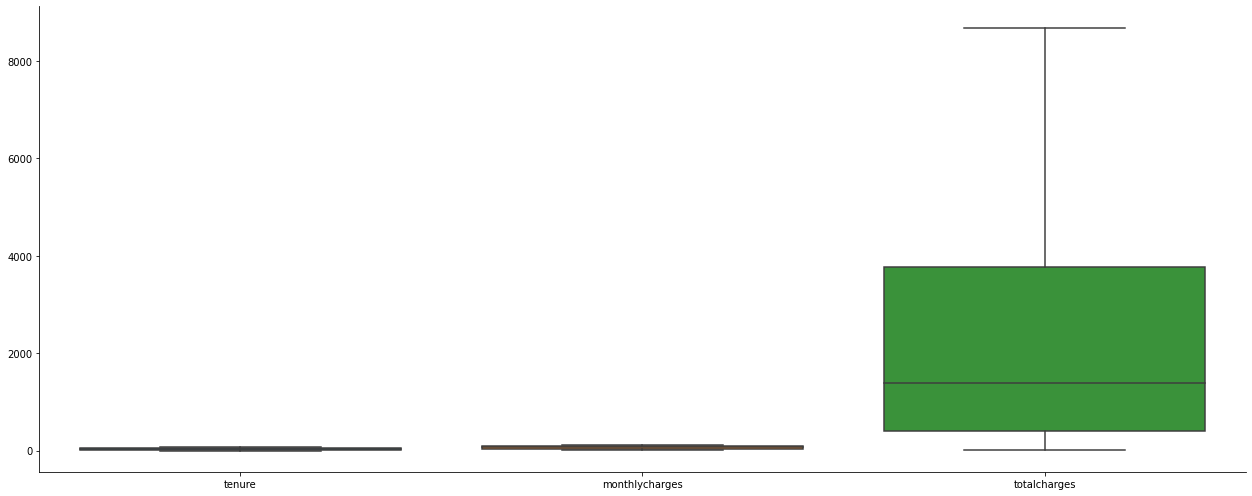

In [106]:
sns.catplot(data=df_quant,
              kind='box',
              height=7,
              aspect=2.5)

#### Verificação dos missing values das variáveis df_quant

In [107]:
df_quant.isnull().sum()

tenure            461
monthlycharges      0
totalcharges        8
dtype: int64

#### Variável quantitativa 'monthlycharges'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb208a7dda0>]],
      dtype=object)

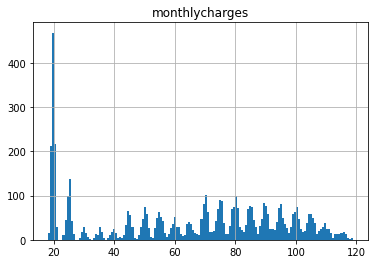

In [108]:
df_quant[['monthlycharges']].hist(bins=150)

In [109]:
df_quant[['monthlycharges']].mode()

,monthlycharges
0,20.05


In [111]:
df_quant[['monthlycharges']].describe()

,monthlycharges
count,"5,634.00"
mean,64.63
std,30.02
min,18.25
25%,35.46
50%,70.25
75%,89.80
max,118.75


In [112]:
# Coeficiente de variação
df_quant[['monthlycharges']].std()/df_quant[['monthlycharges']].mean()*100

monthlycharges   46.45
dtype: float64

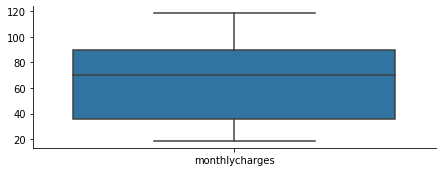

In [113]:
sns.catplot(data=df_quant[['monthlycharges']],
              kind='box',
              height=2.5,
              aspect=2.5)

#### Variável quantitativa 'totalcharges'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2088740f0>]],
      dtype=object)

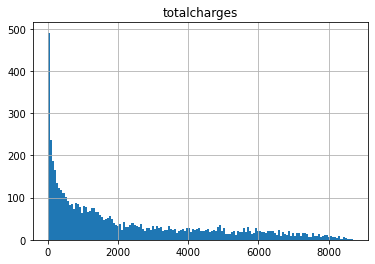

In [114]:
df_quant[['totalcharges']].hist(bins=150)

In [115]:
df_quant[['totalcharges']].describe()

,totalcharges
count,"5,626.00"
mean,"2,273.51"
std,"2,258.38"
min,18.80
25%,401.59
50%,"1,396.12"
75%,"3,764.29"
max,"8,684.80"


In [116]:
# Coeficiente de variação
df_quant[['totalcharges']].std() / df_quant[['totalcharges']].mean() * 100

totalcharges   99.33
dtype: float64

In [117]:
df_quant[['totalcharges']].mode()

,totalcharges
0,20.20


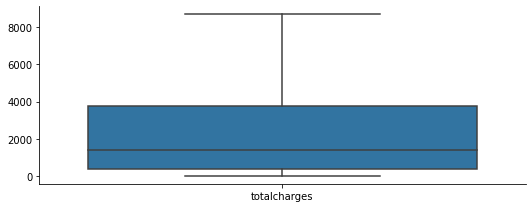

In [118]:
sns.catplot(data=df_quant[['totalcharges']],
              kind='box',
              height=3,
              aspect=2.5)

In [119]:
df_quant['totalcharges_2'] = df_quant['totalcharges'].fillna(df_quant['totalcharges'].mode()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
df_quant[['totalcharges_2']].isnull().any()

totalcharges_2    False
dtype: bool

#### Variável quantitativa 'tenure' (quantidade de meses como cliente da companhia)

In [121]:
df_quant.head(23).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
tenure,56.00,nan,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00,6.00,nan,7.00,1.00,72.00,19.00,8.00,72.00,4.00,38.00,17.00,25.00,70.00
monthlycharges,45.05,19.65,110.80,101.90,70.75,48.40,59.95,19.55,19.65,85.10,18.95,94.90,66.85,69.80,84.45,69.60,43.45,90.45,76.05,81.85,44.45,61.60,57.80
totalcharges,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70",792.15,"1,611.00","4,039.30"
totalcharges_2,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70",792.15,"1,611.00","4,039.30"


In [122]:
df_quant['RazaoCobrTotalMensal'] = df_quant['totalcharges']/df_quant['monthlycharges']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
df_quant['DiferencapercRazaoCobrTotMensal'] = (df_quant['tenure']-df_quant['RazaoCobrTotalMensal'])/df_quant['tenure']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Verifica-se que a razão entre os valores das variáveis CobrancaTotal e CobrancaMensal é um bom indicador<br>
do valor da variável MesesNaCompanhia. Dessa forma, vamos usar essa razão para preencher os valores faltantes <br>
da variável 'MesesNaCompanhia'.

In [124]:
df_quant.tail(23).T

,5611,5612,5613,5614,5615,5616,5617,5618,5619,5620,5621,5622,5623,5624,5625,5626,5627,5628,5629,5630,5631,5632,5633
tenure,9.00,2.00,nan,41.00,14.00,71.00,68.00,17.00,71.00,3.00,49.00,42.00,nan,2.00,64.00,45.00,44.00,3.00,43.00,nan,28.00,63.00,38.00
monthlycharges,24.60,20.35,29.90,20.25,19.50,104.05,95.90,81.50,23.95,18.80,93.85,22.95,49.85,76.40,74.65,25.50,65.40,74.40,44.15,108.65,54.65,25.25,95.00
totalcharges,190.10,33.20,118.25,865.00,272.00,"7,413.55","6,503.20","1,329.20","1,756.20",56.00,"4,733.10","1,014.25","1,336.15",151.80,"4,869.35","1,121.05","2,774.55",215.80,"1,931.30","4,903.20","1,517.50","1,573.05","3,605.60"
totalcharges_2,190.10,33.20,118.25,865.00,272.00,"7,413.55","6,503.20","1,329.20","1,756.20",56.00,"4,733.10","1,014.25","1,336.15",151.80,"4,869.35","1,121.05","2,774.55",215.80,"1,931.30","4,903.20","1,517.50","1,573.05","3,605.60"
RazaoCobrTotalMensal,7.73,1.63,3.95,42.72,13.95,71.25,67.81,16.31,73.33,2.98,50.43,44.19,26.80,1.99,65.23,43.96,42.42,2.90,43.74,45.13,27.77,62.30,37.95
DiferencapercRazaoCobrTotMensal,0.14,0.18,nan,-0.04,0.00,-0.00,0.00,0.04,-0.03,0.01,-0.03,-0.05,nan,0.01,-0.02,0.02,0.04,0.03,-0.02,nan,0.01,0.01,0.00


In [125]:
df_quant = df_quant.drop(columns=['RazaoCobrTotalMensal','DiferencapercRazaoCobrTotMensal'],
                   axis=1)

In [126]:
df_quant.head().T

,0,1,2,3,4
tenure,56.00,nan,60.00,37.00,29.00
monthlycharges,45.05,19.65,110.80,101.90,70.75
totalcharges,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80"
totalcharges_2,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80"


In [127]:
df_quant['tenure_2']  = df_quant['tenure'].fillna(df_quant['totalcharges_2']/df_quant['monthlycharges'])

In [128]:
df_quant.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
tenure,56.00,nan,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00,6.00,nan,7.00,1.00,72.00,19.00,8.00,72.00,4.00,38.00
monthlycharges,45.05,19.65,110.80,101.90,70.75,48.40,59.95,19.55,19.65,85.10,18.95,94.90,66.85,69.80,84.45,69.60,43.45,90.45,76.05,81.85
totalcharges,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70"
totalcharges_2,"2,560.10",332.65,"6,640.70","3,545.35","1,974.80","3,442.80","1,848.80",61.05,"1,008.70","6,155.40",110.15,"4,422.95",458.10,69.80,"6,033.10","1,394.55",345.50,"6,565.85",318.90,"3,141.70"
tenure_2,56.00,16.93,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00,6.00,46.61,7.00,1.00,72.00,19.00,8.00,72.00,4.00,38.00


In [129]:
df_quant_2 = df_quant[['monthlycharges','totalcharges_2','tenure_2']]

In [130]:
df_quant_2.isnull().sum()

monthlycharges    0
totalcharges_2    0
tenure_2          0
dtype: int64

### Discretização das variáveis quantitativas

In [132]:
df_quant_2.nunique()

monthlycharges    1505
totalcharges_2    5285
tenure_2           490
dtype: int64

In [133]:
from sklearn.preprocessing import KBinsDiscretizer

In [134]:
discretizer = KBinsDiscretizer(n_bins=5,
                              encode='ordinal',
                              strategy='quantile')

In [135]:
discretizer.fit(df_quant_2)

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='quantile')

In [136]:
bining = discretizer.fit_transform(df_quant_2)

In [137]:
df_quant_bining = pd.DataFrame(bining,
                                    columns=['monthlycharges',
                                             'totalcharges_2',
                                             'tenure_2'])

In [138]:
df_quant_bining.head(30).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
monthlycharges,1.00,0.00,4.00,4.00,2.00,1.00,2.00,0.00,0.00,3.00,0.00,4.00,2.00,2.00,3.00,2.00,1.00,3.00,2.00,3.00,1.00,2.00,1.00,2.00,1.00,3.00,1.00,2.00,4.00,0.00
totalcharges_2,3.00,1.00,4.00,3.00,2.00,3.00,2.00,0.00,2.00,4.00,0.00,3.00,1.00,0.00,4.00,2.00,1.00,4.00,1.00,3.00,1.00,2.00,3.00,3.00,3.00,4.00,3.00,3.00,4.00,1.00
tenure_2,3.00,1.00,4.00,2.00,2.00,4.00,2.00,0.00,3.00,4.00,1.00,3.00,1.00,0.00,4.00,1.00,1.00,4.00,0.00,2.00,1.00,2.00,4.00,3.00,4.00,4.00,3.00,4.00,4.00,1.00


### Variáveis categóricas

In [ ]:
categóricas.head()

In [ ]:
categóricas.isna().sum()

#### Contagem de valores da variavel genero

In [ ]:
categóricas['genero'].value_counts()

#### Tabela de frequencias Churn x genero

In [ ]:
# Table of survival vs. sex
Churn_genero = pd.crosstab(index=dados["Churn"], 
                           columns=dados["genero"],
                          margins=True)

Churn_genero.columns=['Female','Male',"rowtotal"]
Churn_genero.index= ["0","1","coltotal"]

Churn_genero

In [ ]:
Churn_genero/Churn_genero.loc["coltotal","rowtotal"]

#Temos missing values em duas variáveis categóricas:
#'TemParceiro'        categórica
#'MetodoPagamento'    categórica

#### Imputação de missing values na variável 'TemDependente'
Como 'TemDependente' é uma variável categórica, criaremos uma nova categoria, chamada 'Miss', a qual será imputada a todos os missing values dessa variável.

In [ ]:
categóricas['TemDependentes'] = categóricas['TemDependentes'].fillna(categóricas['TemDependentes']=='Miss')

In [ ]:
categóricas['TemDependentes'].isnull().any()

#### Imputação de missing values na variável 'MetodoPagamento'

In [ ]:
categóricas['MetodoPagamento'] = categóricas['MetodoPagamento'].fillna(categóricas['MetodoPagamento']=='Miss')


In [ ]:
categóricas['MetodoPagamento'].isnull().any()

In [ ]:
categóricas.isnull().sum()

In [ ]:
dados['MetodoPagamento'].value_counts()

## Verificação da cardinalidade das variaveis categoricas
Como todas as variáveis categóricas têm baixa cardinalidade (quantidade de valores únicos menor que 10), vamos criar variáveis dummy para todas.

In [ ]:
categóricas.nunique()

In [ ]:
dummies = pd.get_dummies(categóricas,
                        prefix_sep='_',
                        drop_first=True)

In [ ]:
dummies.head()

In [ ]:
dummies['Idoso'].unique()

In [ ]:
dummies.columns

## Formação dos bancos de dados explicativas e target

In [ ]:
explicativas=pd.concat([df_quant_bining,dummies],
                      axis=1)

In [ ]:
explicativas.columns

In [ ]:
#explicativas.drop(['id'],axis=1,inplace=True)
explicativas.head()

In [ ]:
target.head()

## Separação dos conjuntos de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(explicativas,
                                                       target,
                                                       test_size=0.3,
                                                      random_state=42)

## Tuninng de hiperparâmetros
Inicialmente, chamar o módulo de tuning.<br>
Passo a passo <br>
1 - definir um dict(dicionario com os valores dos hiperparams)<br>
2 - chamar o modulo de tunning<br>
3 - chamar obj do tunning<br>
4 - treinamento<br>
5 - avaliar os resultados

### Chamar o módulo de Tuning

In [ ]:
from sklearn.model_selection import  GridSearchCV

### Chamar módulo de acurácia

In [ ]:
from sklearn.metrics import accuracy_score

### Random Forest

In [ ]:
import timeit

In [ ]:
#1
rf_dict = {                            # nome do dicionário que está sendo criado.
    'n_estimators':[40,50,60,70],   # numero de estimadores que será testado. Quanto maior, mais exige poder computacional.
    'criterion':['gini', 'entropy'],   #  critérios
    'bootstrap':[False, True],  # Faz amostragem com e sem reposição.
    'random_state': [42]
}


In [ ]:
#2
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#3
rf = RandomForestClassifier(random_state=42)


In [ ]:
rf_grid = GridSearchCV(estimator=rf,
                      param_grid=rf_dict,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1)


In [ ]:
import joblib

In [ ]:
rf_grid.fit(x_treino, y_treino)#.values.ravel()  colocar este comando depois de y_treino se precisar.

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
accuracy_score(y_teste, rf_grid.predict(x_teste))

### Gradient Boosting

In [ ]:
gb_dict = { 
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    'random_state': [1967]    
    }

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

In [ ]:
gb_grid = GridSearchCV(estimator=gb,
                       param_grid=gb_dict,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1 # ACELERA O TEMPO DE PROCESSAMENTO
                      )

In [ ]:
gb_grid.fit(x_treino,y_treino)

In [ ]:
gb_grid.best_params_

In [ ]:
gb_grid.best_score_

In [ ]:
gb_grid.best_estimator_

### Salvar melhor modelo

In [ ]:
import joblib

In [ ]:
joblib.dump(gb_grid.best_estimator_,
            'modelo_exemplo_gb.pkl',
            compress=1)

### Score do grupo de teste

In [ ]:
dados_teste = pd.read_csv('test.csv', sep=',')

In [ ]:
dados_teste.head()

In [ ]:
dados_teste = dados_teste.rename(columns={
    'id':'id',
    'gender':'genero',
    'SeniorCitizen':'Idoso',
    'Partner':'TemParceiro',
    'Dependents':'TemDependentes',
    'tenure':'MesesNaCompanhia',
    'PhoneService':'TemTelefone',
    'MultipleLines':'MaisLinhas',
    'InternetService':'TemInternet',
    'OnlineSecurity':'ServicoSegurancaOnline',
    'OnlineBackup':'ServicoBackupOnline',
    'DeviceProtection':'ServicoProtecaoOnline',
    'TechSupport':'ServicoSuporteOnline',
    'StreamingTV':'ServicoTV',
    'StreamingMovies':'ServicoPctFilmes',
    'Contract':'Contrato',
    'PaperlessBilling':'ContaOnline',
    'PaymentMethod':'MetodoPagamento',
    'MonthlyCharges':'CobrancaMensal',
    'TotalCharges':'CobrancaTotal'
})

In [ ]:
df_quant_teste = dados_teste[['MesesNaCompanhia','CobrancaMensal','CobrancaTotal']]
categóricas_teste = dados_teste.drop(columns=['id','MesesNaCompanhia','CobrancaMensal','CobrancaTotal'],
                         axis=1)

In [ ]:
df_quant_teste.head()

In [ ]:
categóricas_teste.head()

In [ ]:
df_quant_teste['CobrancaTotal'] = pd.to_numeric(df_quant_teste['CobrancaTotal'], errors='coerce')

In [ ]:
df_quant_teste.dtypes

In [ ]:
df_quant_teste.isnull().sum()

In [ ]:
df_quant_teste['CobrancaTotal_2'] = df_quant_teste['CobrancaTotal'].fillna(df_quant_teste['CobrancaTotal'].mode()[0])

In [ ]:
df_quant_teste[['CobrancaTotal_2']].isnull().any()

In [ ]:
df_quant_teste['MesesNaCompanhia_2']  = df_quant_teste['MesesNaCompanhia'].fillna(df_quant_teste['CobrancaTotal']/
                                                                               df_quant_teste['CobrancaMensal'])

In [ ]:
df_quant_teste['MesesNaCompanhia_2'].isnull().any()

In [ ]:
df_quant_teste_2 = df_quant_teste[['CobrancaMensal','CobrancaTotal_2','MesesNaCompanhia_2']]

In [ ]:
df_quant_teste_2.head()

In [ ]:
df_quant_teste_2.isnull().sum()

In [ ]:
discretizer_teste = KBinsDiscretizer(n_bins=5,
                              encode='ordinal',
                              strategy='quantile')

In [ ]:
discretizer_teste.fit(df_quant_teste_2)

In [ ]:
bining_teste = discretizer_teste.fit_transform(df_quant_teste_2)

In [ ]:
df_quant_teste_bining = pd.DataFrame(bining_teste,
                                    columns=['CobrancaMensal',
                                             'CobrancaTotal_2',
                                             'MesesNaCompanhia_2'])

In [ ]:
df_quant_teste_bining.head()

In [ ]:
df_quant_teste_bining.isnull().sum()

In [ ]:
categóricas_teste.head()


In [ ]:
categóricas_teste.isnull().sum()

In [ ]:
categóricas_teste['TemDependentes'] = categóricas_teste['TemDependentes'].fillna(categóricas_teste['TemDependentes']=='Miss')

In [ ]:
categóricas_teste['MetodoPagamento'] = categóricas_teste['MetodoPagamento'].fillna(categóricas_teste['MetodoPagamento']=='Miss')

In [ ]:
categóricas_teste.isnull().sum()

In [ ]:
categóricas_teste.nunique()

In [ ]:
dummies_teste = pd.get_dummies(categóricas_teste,
                        prefix_sep='_',
                        drop_first=True)

In [ ]:
dummies_teste.head()

In [ ]:
dummies_teste.columns

In [ ]:
explicativas_teste=pd.concat([df_quant_teste_bining,dummies_teste],
                      axis=1)

In [ ]:
explicativas_teste.head()

In [ ]:
explicativas_teste.shape

In [ ]:
explicativas_teste.isnull().sum()

In [ ]:
df_id = dados_teste[['id']]

In [ ]:
df_id.head()

In [ ]:
import joblib

In [ ]:
modelo_salvo = joblib.load(open('modelo_exemplo_gb.pkl', 'rb'))

In [ ]:
modelo_salvo

In [ ]:
resposta = modelo_salvo.predict(explicativas_teste)

In [ ]:
resposta_df = pd.DataFrame(resposta, columns=['Churn'])

In [ ]:
resposta_df.head()

In [ ]:
resultado_submissao = pd.concat([df_id,
                                resposta_df], axis=1)

In [ ]:
resultado_submissao.head().T

In [ ]:
resultado_submissao.to_csv('submissao_kaggle_2.csv', index=False)

In [ ]:
csv = pd.read_csv('submissao_kaggle_2.csv',sep=',')

In [ ]:
csv.head()